In [173]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [174]:
H = 0.25
L = 1

alpha = 207*10**(-6) #Volume expansion coefficient of water @ 20 C
k = 0.6     #Thermal conductivity of water @ 20 C

#ReC = 1100.65 #Critical Rayleigh number for one free and one rigid boundary condition
ReC = 1708     #Critical Rayleigh number for two rigid body boundary condition
g = 9.81
D = 1.43E-7  #Thermal diffusivity of water
rho_i = 1000   #Density of water @ 20 C

L = 100
H = 0.001

nxy = 101
nt = 6000

dxy = L/(nxy-1)

x = np.linspace(0,L,nxy)
y = np.linspace(0,H,nxy)
ya = np.ones((nxy,nxy))
for i in range(nxy):
    ya[:,i] = y
#Change to Kelivin?
To = 20
vo = 2.414*10**(-5) * 10**(247.8/(To + 273 - 140)) / rho_i  #initial kinematic viscosity of water
delT = (1700*vo*1.43*10**(-7))/(alpha*g*H**3)
Ti = np.ones((nxy, nxy))*(To + (H-ya)/H*(70-To))
Ti[-1,:] = To + 50

rho = np.ones((nxy,nxy), dtype=float)*rho_i
rho[0,:] = rho_i*(1-alpha*(Ti[0,:] - To))

v = np.ones((nxy,nxy))*2.414*10**(-5) * 10**(247.8/(Ti + 273 - 140)) / rho  #kinematic viscosity of water

pi = np.zeros((nxy,nxy), dtype=float)
pi[:,:] = rho[:,:] * (H-ya[:,:]) * g

ui = np.zeros((nxy,nxy), dtype=float)

print('delT =',delT, 'Tl =',20+delT)
print(vo)
#print('x =', x, 'y =', y)

delT = 120.36236563779158 Tl = 140.36236563779158
1.0054144180571545e-06


In [175]:
# stability
sigma = 0.00005
#dt = sigma*min(dxy,dxy)**2/D
dt = 0.001

print(dt)

0.001


In [176]:
print(dxy)

1.0


In [177]:
def ftcs(T, To, u, p, rho, rho_i, alpha, v, D, g, ya, H,delT, nt, dt, dxy):
    
    for n in range(nt):

        un = u.copy()
        Tn = T.copy()
        pn = p.copy()
        vn = v.copy()
        T[1:-1,1:-1] = Tn[1:-1,1:-1] + dt*((un[1:-1,1:-1]/dxy)*(Tn[2:,1:-1]\
                    + Tn[1:-1,2:] - (2*Tn[1:-1,1:-1])) + 
                    (D/dxy**2)*(Tn[2:,1:-1] + Tn[:-2,1:-1] + Tn[1:-1,2:]\
                    + Tn[1:-1,:-2] - (4*Tn[1:-1,1:-1])))
        
        T[0,:] = To + 50 #Bottom Boundary
        T[-1,:] = To   #top Boundary
        
        rho[1:-1,1:-1] = rho_i*(1- alpha*(T[1:-1,1:-1] - 20))
        p[1:-1,1:-1] = rho[1:-1,1:-1]*(H-ya[1:-1,1:-1]) * g
        
        v[1:-1,1:-1] = 2.414*10**(-5) * 10**(247.8/(T[1:-1,1:-1] + 273 - 140)) / rho[1:-1,1:-1]
        
        u[1:-1,1:-1] = un[1:-1,1:-1] + dt*(-(1/rho_i)*(p[2:,1:-1] + p[1:-1,2:] - 2*p[1:-1,1:-1]) + (rho[1:-1,1:-1]*g/rho_i)\
                                           + (1/dxy)*(u[1:-1,1:-1]*0.5*(u[2:,1:-1] - u[:-2,1:-1] \
                                                                      + u[1:-1,2:] - u[1:-1,:-2]) \
                                           + (v[1:-1,1:-1]/dxy)*(u[2:,1:-1] + u[:-2,1:-1] + u[1:-1,2:] + u[1:-1,:-2] - 4*u[1:-1,1:-1])))
        
        #del u = 0
        u[1:,1:] = 0.5*(u[:-1,1:] + u[1:,:-1])
        
        u[-1,:] = 0 #Top Boundary
        u[0,:] = 0   #Bottom Boundary

                                           
    return u, T

In [178]:
u, T = ftcs(Ti,To,ui,pi,rho,rho_i,alpha,v,D,g,ya,H,delT,nt,dt,dxy)

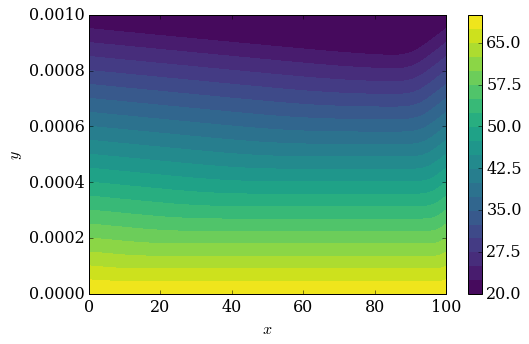

In [179]:
plt.figure(figsize=(8,5))
plt.contourf(x,y,T,20,cmap=cm.viridis)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.colorbar();


In [180]:
print(T)

[[ 70.          70.          70.         ...,  70.          70.          70.        ]
 [ 69.5         69.49999999  69.48489334 ...,  69.46914298  69.47011913
   69.5       ]
 [ 69.          68.98489332  68.9546724  ...,  68.90788283  68.91561358
   69.        ]
 ..., 
 [ 21.          20.96881866  20.90692777 ...,  20.37500004  20.62500001
   21.        ]
 [ 20.5         20.46981245  20.41480439 ...,  20.12500001  20.25000001
   20.5       ]
 [ 20.          20.          20.         ...,  20.          20.          20.        ]]


In [181]:
print(ui)

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.00485479 ...,  0.00970978  0.00970978
   0.00970973]
 [ 0.          0.00485479  0.01456496 ...,  0.02913091  0.02913086
   0.02427588]
 ..., 
 [ 0.          0.00980624  0.02941929 ...,  1.79855969  1.80774826
   1.80654397]
 [ 0.          0.00980726  0.02942231 ...,  1.80633264  1.81605858
   1.81538929]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]
